# PyTorch Neural Network Classificaiton

In [2]:
import sklearn

# Refer to https://scikit-learn.org/stable/install.html

In [3]:
# Refer to https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html

from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# create circle

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

# Here y, represents the membership of every point of both the circles.
# It's a binary data (representing 0 and 1) and is given to identify the points are on bigger circle or smaller circle

In [4]:
len(X), len(y)

(1000, 1000)

In [5]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [6]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0], 
                        "X2": X[:, 1],
                        "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


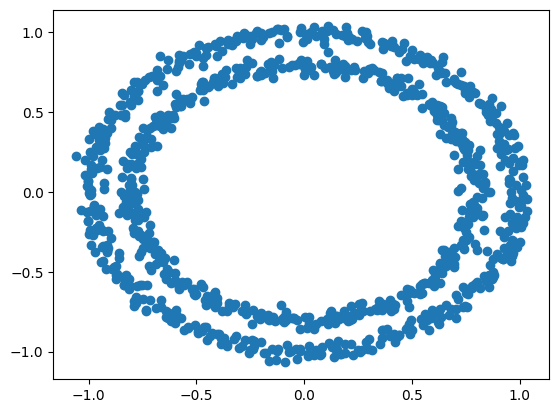

In [7]:
# Visualize the Data
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y)

NOTE: The data we're working on is called *toy dataset*, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

### 1.1 Check input and output shapes

In [443]:
X.shape, y.shape

((1000, 2), (1000,))

In [444]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [445]:
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the sample for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the sample for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the sample for y: 1
Shapes for one sample of X: (2,) and the sample for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [446]:
import torch

X_tensor = torch.from_numpy(X).type(torch.float32)
y_tensor = torch.from_numpy(y).type(torch.float32)

torch.__version__

'2.0.1+cu118'

In [447]:
X_tensor[:5], y_tensor[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [448]:
# Splitting Data in training and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor,
                                                    test_size=0.2, # <- 20% data is test
                                                    random_state=42)

In [449]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a Model

let's build a model to classify our purple and yellow dots.

To do so, we want to:
1. Setup device agnostic code so our code will run on an accelerator (GPU)
2. Construct a model
3. Define a loss function and optimizer
4. Create a training loop and test loop


In [450]:
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [451]:
# class CircleModelV0(nn.Module):
#     def __init__(self) -> None:
#         super().__init__()

#         self.layer_1 = nn.Linear(in_features=2, # <- X_train.shape is ([800, 2])
#                                  out_features=16)
        
#         self.layer_2 = nn.Linear(in_features=16, # <- This has to match the output of layer_1
#                                  out_features=1)
        
#     def forward(self, x:torch.Tensor):
#         return self.layer_2(self.layer_1(x)) # x -> Layer 1 -> Layer 2 -> Output

In [452]:
# model_0 = CircleModelV0().to(device)

# model_0

In [453]:
# Let's replicate the model above using nn.Sequential()

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [454]:
# Make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)} ; Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)} ; Shape: {X_test.shape}")
print(f"\nFirst 10 preds: \n{untrained_preds[:10]}")
print(f"\nFirst 10 labels: \n{y_test[:10]}")

Length of predictions: 200 ; Shape: torch.Size([200, 1])
Length of test samples: 200 ; Shape: torch.Size([200, 2])

First 10 preds: 
tensor([[ 0.0004],
        [-0.0377],
        [-0.0430],
        [ 0.0133],
        [-0.2707],
        [-0.2922],
        [-0.2191],
        [-0.2793],
        [-0.0333],
        [-0.0428]], device='cuda:0')

First 10 labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [455]:
# Loss Function

loss_fn = nn.BCEWithLogitsLoss()

# Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                             lr=0.1)

In [456]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

### 3.1 Going from raw logits -> prediction probilities -> prediction labels

Our model outputs are going to be a raw **logit**

we can convert these **logits** into prediction probilities by passing them to some kind of activation function (eg.: sigmoid for binarty classification and softmax for multiclass classifiction).

Then we can convert our model's prediction probilities to **prediction labels** by either rounding them or taking the `argmax()`

In [457]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.0004],
        [-0.0377],
        [-0.0430],
        [ 0.0133],
        [-0.2707]], device='cuda:0')

In [458]:
# Use the sigmoid activation function on our model logits to turn them into prediction probilities

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5001],
        [0.4906],
        [0.4893],
        [0.5033],
        [0.4327]], device='cuda:0')

In [459]:
y_preds = torch.round(y_pred_probs)

y_preds.squeeze()

tensor([1., 0., 0., 1., 0.], device='cuda:0')

### 3.2 Building the model

In [460]:
torch.manual_seed(42)

epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs + 1):
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # Calculate the test loss
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69713 | Acc: 46.75% | Test loss: 0.69687 | Test acc: 43.50%
Epoch: 10 | Loss: 0.69504 | Acc: 48.50% | Test loss: 0.69495 | Test acc: 46.50%
Epoch: 20 | Loss: 0.69416 | Acc: 49.38% | Test loss: 0.69412 | Test acc: 44.50%
Epoch: 30 | Loss: 0.69375 | Acc: 50.00% | Test loss: 0.69372 | Test acc: 46.50%
Epoch: 40 | Loss: 0.69355 | Acc: 50.38% | Test loss: 0.69353 | Test acc: 47.00%
Epoch: 50 | Loss: 0.69343 | Acc: 50.38% | Test loss: 0.69342 | Test acc: 50.50%
Epoch: 60 | Loss: 0.69336 | Acc: 49.75% | Test loss: 0.69337 | Test acc: 50.50%
Epoch: 70 | Loss: 0.69330 | Acc: 50.00% | Test loss: 0.69335 | Test acc: 52.50%
Epoch: 80 | Loss: 0.69326 | Acc: 49.50% | Test loss: 0.69335 | Test acc: 55.00%
Epoch: 90 | Loss: 0.69323 | Acc: 49.25% | Test loss: 0.69336 | Test acc: 53.00%
Epoch: 100 | Loss: 0.69320 | Acc: 50.12% | Test loss: 0.69338 | Test acc: 53.50%


## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything

So to inspect it let's make some predictions visual

To do so, we're 

In [461]:
import numpy as np

def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


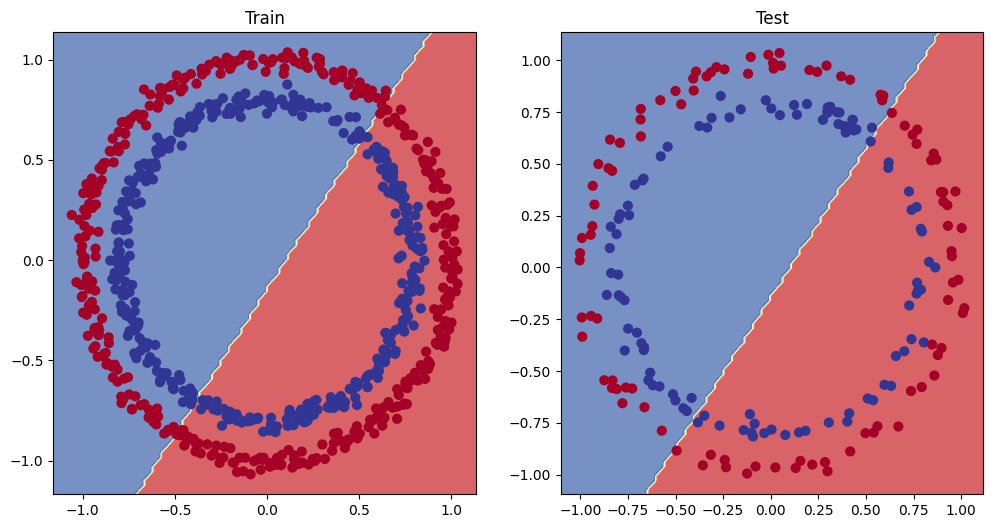

In [462]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

# 5. Improving a model

* Add more layers
* Add more hidden units
* Fir for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

In [463]:
class CircleModelV1(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        
        self.layer_1 = nn.Linear(in_features=2, out_features=10)

        self.layer_2 = nn.Linear(in_features=10, out_features=10)

        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x:torch.Tensor):
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)

In [464]:
# Loss Function

loss_fn_1 = nn.BCEWithLogitsLoss()

# Optimizer
optimizer_1 = torch.optim.SGD(params=model_1.parameters(),
                             lr=0.01)

In [465]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1_000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs + 1):
    model_1.train()

    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn_1(y_logits, y_train)
    acc = accuracy_fn(y_train, y_pred)

    optimizer_1.zero_grad()

    loss.backward()

    optimizer_1.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # Calculate the test loss
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396 | Acc: 50.88% | Test loss: 0.69261 | Test acc: 51.00%
Epoch: 100 | Loss: 0.69369 | Acc: 50.25% | Test loss: 0.69269 | Test acc: 50.00%
Epoch: 200 | Loss: 0.69351 | Acc: 50.12% | Test loss: 0.69282 | Test acc: 49.50%
Epoch: 300 | Loss: 0.69339 | Acc: 50.50% | Test loss: 0.69295 | Test acc: 49.00%
Epoch: 400 | Loss: 0.69329 | Acc: 50.38% | Test loss: 0.69309 | Test acc: 48.50%
Epoch: 500 | Loss: 0.69322 | Acc: 49.88% | Test loss: 0.69322 | Test acc: 49.50%
Epoch: 600 | Loss: 0.69317 | Acc: 49.50% | Test loss: 0.69335 | Test acc: 53.00%
Epoch: 700 | Loss: 0.69313 | Acc: 49.38% | Test loss: 0.69347 | Test acc: 50.50%
Epoch: 800 | Loss: 0.69309 | Acc: 50.00% | Test loss: 0.69358 | Test acc: 51.00%
Epoch: 900 | Loss: 0.69307 | Acc: 50.62% | Test loss: 0.69368 | Test acc: 47.50%
Epoch: 1000 | Loss: 0.69305 | Acc: 50.50% | Test loss: 0.69378 | Test acc: 49.00%


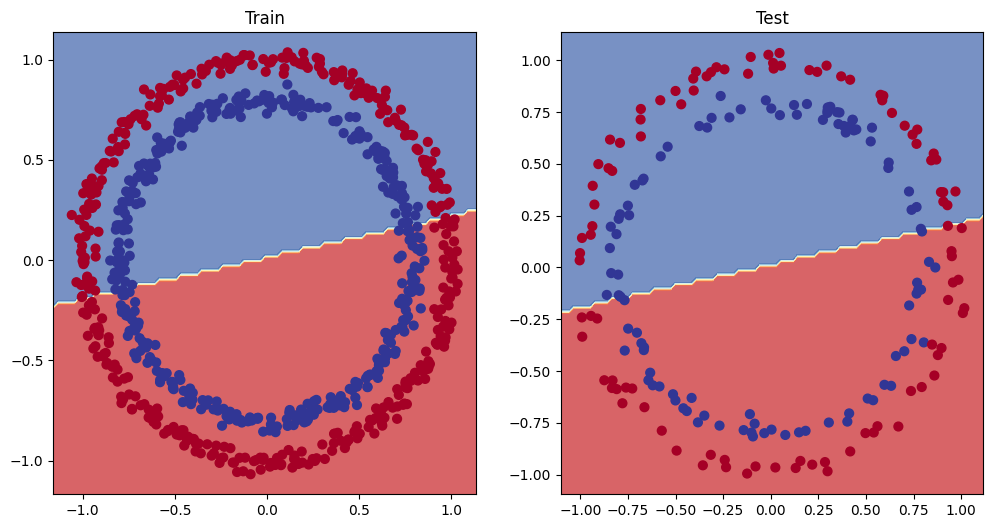

In [466]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

# 6. The Missing Piece: non-linearity

In [467]:
class CircleModelV2(nn.Module):
    def __init__(self) -> None:
        super().__init__()

        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

        self.relu = nn.ReLU() # ReLU is a non-linear activation fn

    def forward(self, x:torch.Tensor):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [468]:
model_2 = CircleModelV2().to(device)

loss_fn_2 = nn.BCEWithLogitsLoss()

optimizer_2 = torch.optim.SGD(params=model_2.parameters(),
                              lr=0.1)

In [469]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Training the model
loss_record = []

epochs = 1000

for epoch in range(epochs):
    model_2.train()

    y_logits_2 = model_2(X_train).squeeze()

    loss_2 = loss_fn_2(y_logits_2, y_train)
    loss_record.append(loss_2.item())

    y_pred = torch.round(torch.sigmoid(y_logits_2))

    acc = accuracy_fn(y_train, y_pred)

    optimizer_2.zero_grad()

    loss_2.backward()

    optimizer_2.step()

    # Testing the data for every 100th epoch

    model_2.eval()
    with torch.inference_mode():
        y_logits_preds = model_2(X_test).squeeze()
        y_preds = torch.round(torch.sigmoid(y_logits_preds))
        test_acc = accuracy_fn(y_test, y_preds)
    
    if epoch % 20 == 0:
        # Print out the data
        print(f"Epoch: {epoch} | LOSS: {loss_2:5f} | Train Acc: {acc:2f}% | Test Acc: {test_acc:2f}%")


Epoch: 0 | LOSS: 0.692946 | Train Acc: 50.000000% | Test Acc: 50.000000%
Epoch: 20 | LOSS: 0.692246 | Train Acc: 59.125000% | Test Acc: 56.500000%
Epoch: 40 | LOSS: 0.691948 | Train Acc: 68.375000% | Test Acc: 71.000000%
Epoch: 60 | LOSS: 0.691675 | Train Acc: 54.000000% | Test Acc: 54.500000%
Epoch: 80 | LOSS: 0.691413 | Train Acc: 52.625000% | Test Acc: 53.000000%
Epoch: 100 | LOSS: 0.691153 | Train Acc: 52.875000% | Test Acc: 52.500000%
Epoch: 120 | LOSS: 0.690899 | Train Acc: 53.125000% | Test Acc: 54.000000%
Epoch: 140 | LOSS: 0.690635 | Train Acc: 53.000000% | Test Acc: 54.500000%
Epoch: 160 | LOSS: 0.690365 | Train Acc: 53.000000% | Test Acc: 55.000000%
Epoch: 180 | LOSS: 0.690078 | Train Acc: 52.750000% | Test Acc: 55.000000%
Epoch: 200 | LOSS: 0.689774 | Train Acc: 53.375000% | Test Acc: 55.000000%
Epoch: 220 | LOSS: 0.689457 | Train Acc: 55.125000% | Test Acc: 56.000000%
Epoch: 240 | LOSS: 0.689117 | Train Acc: 53.750000% | Test Acc: 56.000000%
Epoch: 260 | LOSS: 0.688753 | T

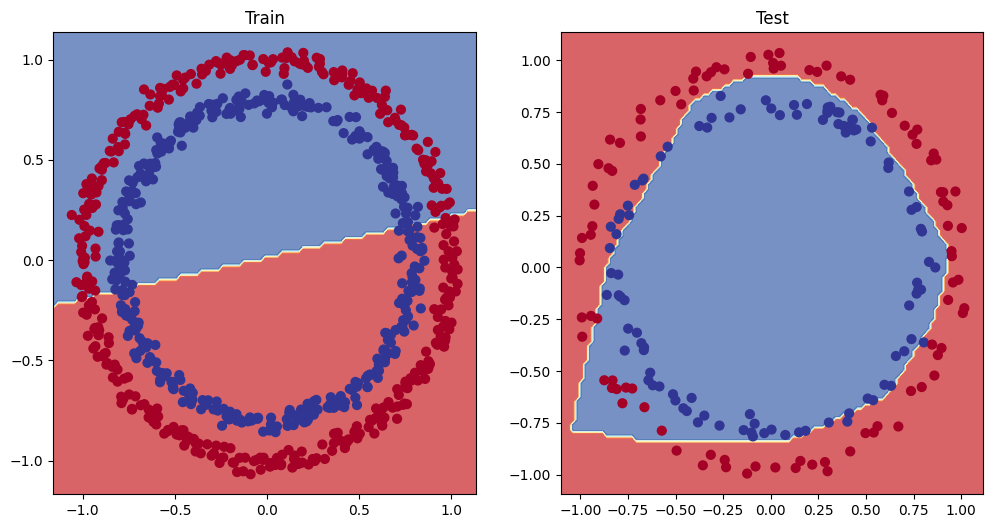

In [470]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test) # model_3 = has non-linearity

In [471]:
# Finding lowest loss
loss_record_numpy = np.array(loss_record)
loss_record_tensor = torch.tensor(loss_record_numpy).to(device)

min_epochs = loss_record_numpy.argmin()

min_epochs

999

In [472]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_3 = CircleModelV2().to(device)

loss_fn_3 = nn.BCEWithLogitsLoss()

optimizer_3 = torch.optim.SGD(params=model_3.parameters(),
                              lr=0.1)
                              

In [473]:
for epoch in range(min_epochs):
    model_3.train()

    y_logits_3 = model_3(X_train).squeeze()

    loss_3 = loss_fn_3(y_logits_3, y_train)

    acc = accuracy_fn(y_train, y_pred)

    optimizer_3.zero_grad()

    loss_3.backward()

    optimizer_3.step()

    # Testing the data for every 100th epoch

    model_2.eval()
    with torch.inference_mode():
        y_logits_preds = model_3(X_test).squeeze()
        y_preds = torch.round(torch.sigmoid(y_logits_preds))
        test_acc = accuracy_fn(y_test, y_preds)
    
    if epoch % 20 == 0:
        # Print out the data
        print(f"Epoch: {epoch} | LOSS: {loss_2:5f} | Train Acc: {acc:2f}% | Test Acc: {test_acc:2f}%")
    
    

Epoch: 0 | LOSS: 0.568905 | Train Acc: 87.625000% | Test Acc: 50.000000%
Epoch: 20 | LOSS: 0.568905 | Train Acc: 87.625000% | Test Acc: 56.500000%
Epoch: 40 | LOSS: 0.568905 | Train Acc: 87.625000% | Test Acc: 71.000000%
Epoch: 60 | LOSS: 0.568905 | Train Acc: 87.625000% | Test Acc: 54.500000%
Epoch: 80 | LOSS: 0.568905 | Train Acc: 87.625000% | Test Acc: 53.000000%
Epoch: 100 | LOSS: 0.568905 | Train Acc: 87.625000% | Test Acc: 52.500000%
Epoch: 120 | LOSS: 0.568905 | Train Acc: 87.625000% | Test Acc: 54.000000%
Epoch: 140 | LOSS: 0.568905 | Train Acc: 87.625000% | Test Acc: 54.500000%
Epoch: 160 | LOSS: 0.568905 | Train Acc: 87.625000% | Test Acc: 55.000000%
Epoch: 180 | LOSS: 0.568905 | Train Acc: 87.625000% | Test Acc: 55.000000%
Epoch: 200 | LOSS: 0.568905 | Train Acc: 87.625000% | Test Acc: 55.000000%
Epoch: 220 | LOSS: 0.568905 | Train Acc: 87.625000% | Test Acc: 56.000000%
Epoch: 240 | LOSS: 0.568905 | Train Acc: 87.625000% | Test Acc: 56.000000%
Epoch: 260 | LOSS: 0.568905 | T

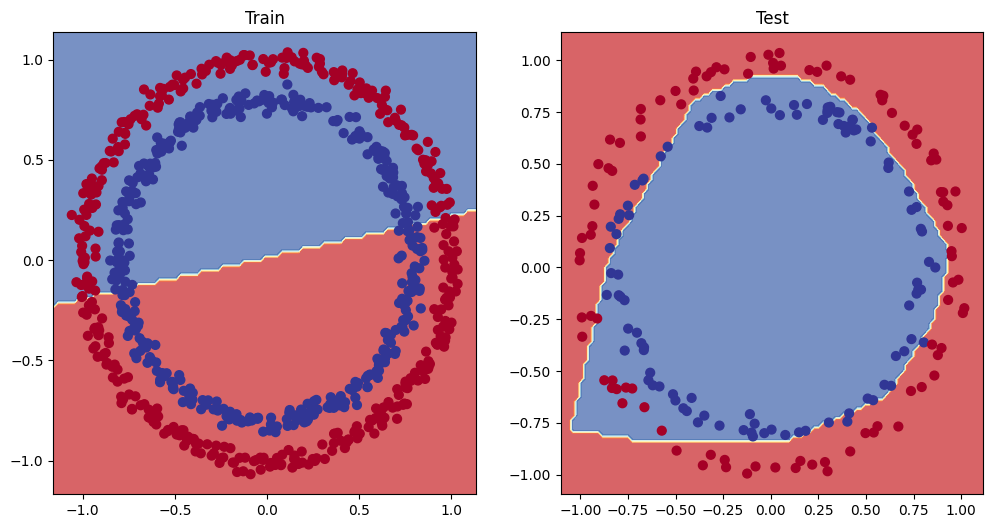

In [474]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity